In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


Testing:
1. normal vs. normal
2. binomial w small n * p vs. normal

In [16]:
#Set a Random Seed
np.random.seed(seed=100)

#generate the distributions that we are testing against the Normal
dist_n = np.random.randn(1000)
dist_b = np.random.binomial(1, 0.5, 1000)

#AD and KS tests
print ("KS - Normal Random vs. Normal:\n", scipy.stats.kstest(dist_n,'norm'), "\n")
print ("AD - Normal Random vs. Normal:\n", scipy.stats.anderson(dist_n, dist='norm'),"\n")

print ("KS - Binomial Random vs. Normal:\n", scipy.stats.kstest(dist_b,'norm'),"\n")
print ("AD - Binomial Random vs. Normal:\n", scipy.stats.anderson(dist_b, dist='norm'), "\n")

#check the Anderson 100% CI critical value Threshold
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print ("Anderson Threshold at 100% CI:\t",threshold)

KS - Normal Random vs. Normal:
 KstestResult(statistic=0.023887820707956503, pvalue=0.61808512903630208) 

AD - Normal Random vs. Normal:
 AndersonResult(statistic=0.27855178540676206, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])) 

KS - Binomial Random vs. Normal:
 KstestResult(statistic=0.5, pvalue=0.0) 

AD - Binomial Random vs. Normal:
 AndersonResult(statistic=180.34080185864104, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])) 

Anderson Threshold at 100% CI:	 [ 1.088]


**The Anderson threshold that we are saving is the critical value for the Anderson test at a 100% confidence interval. **

(From scipy documentation:  "If A2 is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.")

**Normal vs. Normal KS:**
Null Hypothesis the two distributions (random normal and normal) are identical.  We have a p value of 0.6 so we so we fail to reject the null hypothesis (confirms that our data is approximately normal)

**Normal vs. Normal AD:**
Null Hypothesis is that the our data (normal) comes from the normal distribution.  We have a AD stat of 0.24, which is siginificantly lower than the CVs in the array, so we fail to reject the null hypothesis (confirms that our data is approximately normal).

**Binomial vs. Normal KS:**
Null Hypothesis the two distributions (random binomial and normal) are identical.  We have a p value of 0 so we so reject the null hypothesis (confirms that our data is NOT normal).

**Binomial vs. Normal AD:**
Null Hypothesis is that the our data (binomial) comes from the normal distribution.  We have a AD stat of ~180, which is much higher than our AD threshold, so we reject the null hypothesis with a 100% CI (confirms that our data is NOT normal).

In [17]:
#trying to calculate the PDF and CDF

distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest

pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) evaluated at the bin centers of the histogram from before

In [18]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print ("Entropy - Normal Random vs.Normal:\t", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n)))
print ("Entropy - Binomial Random vs. Normal:\t", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b))) 

#you can interpret this as a distance: it increases as the distributions diverge

Entropy - Normal Random vs.Normal:	 0.0085098571999
Entropy - Binomial Random vs. Normal:	 1.66836069365


**It looks like a high value is rejecting the Null Hypothesis that our distribution resembles a normal distribution**

#Binomial Test Statistics

In [20]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop to generate a distribution for the given parameters 
#and run all tests against it that parameter set at once

p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    #change the below normal PDF to have a mean of np and a variance of n*p*(1.0-p)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

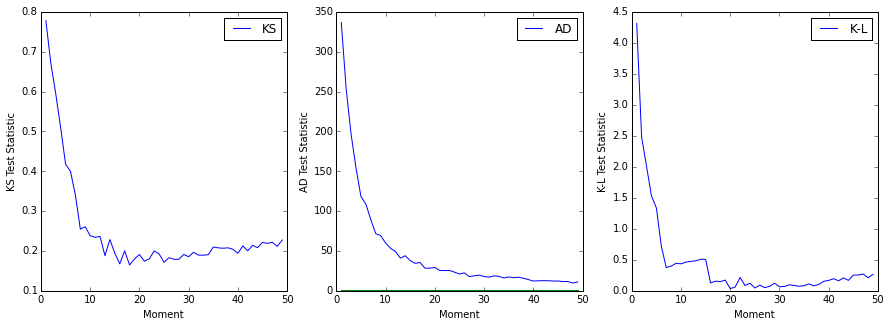

In [26]:
#Plot the test statistics at for different values of P in the Binommial
fig = pl.figure(figsize = (15,5))
pl.title = "Binomial Test Statistics at Different n's"

fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()
pl.xlabel('Moment')
pl.ylabel('KS Test Statistic')

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()
pl.xlabel('Moment')
pl.ylabel('AD Test Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()
pl.xlabel('Moment')
pl.ylabel('K-L Test Statistic')


The above graphs show the moment of our random Binomial vs. a range of statistics.  These graphs illustrate that as you increase n, the Binomial distribution will increasingly start to resemble a Normal Distribution.  For all of the above tests (KS, AD, and K-L/Entropy), we are able to generally say that a low test statistic implies that our distribution behaves approximately normal (the distribution we are comparing it to).

#POISSON

In [28]:
#empty arrayto store the values of n i want to test. 
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))

#then i put the tests in a for loop to generate a distribution for the given parameters 
#and run all tests against it that parameter set at once


for i,n in enumerate(narray):
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    #changed from original code to the below normal PDF to have a mean of lamda and a variance of lamda 
    kl_p[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n, scale=n))
    

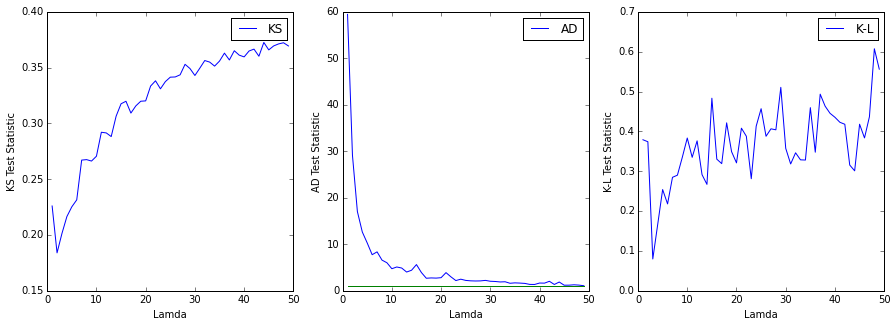

In [29]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS')
pl.legend()
pl.xlabel('Lamda')
pl.ylabel('KS Test Statistic')

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()
pl.xlabel('Lamda')
pl.ylabel('AD Test Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L ')
pl.legend()
pl.xlabel('Lamda')
pl.ylabel('K-L Test Statistic')


**KS:** tests that our Poisson Distribution and Normal Distributions are the same.  WIth increasing Lamda, our KS test statisic is increasing, which is implying that as we increase lamba, our poisson does not become increasingly normal.  This contradicts the Central Limit Theorum.  

**AD:** tests that our Poisson distribution comes from the normal distribution.  As our Lamda increases, the AD test statistic rapidly decreases, confirming the Central Limit Theorum.

**K-L:** We have a rapid drop is the KS statistic, and it then oscillates with a lot of noise while gradually increasing. A high K-L value is rejecting the Null Hypothesis that our distribution resembles a normal distribution, which contradicts the Central Limit Theorum.

#Fun with KL: 

the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

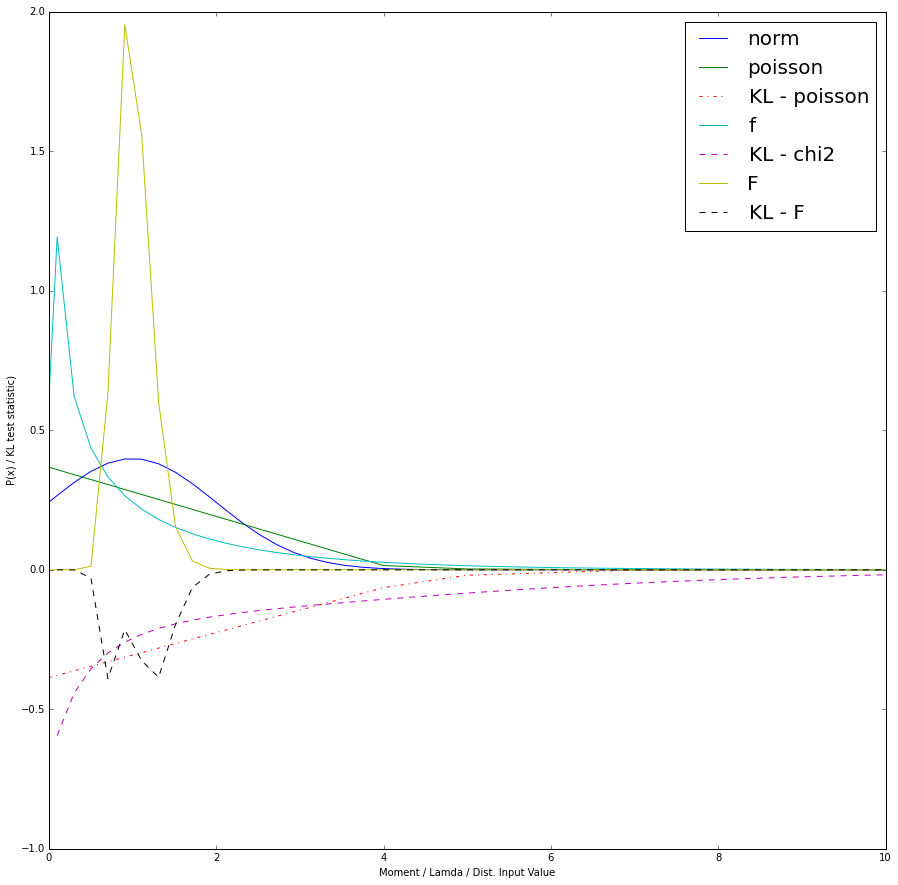

In [30]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

#calculation of the KL statistic
#computes this for every point in the graph
Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
#pois only takes integers to make another linspace to have the KL stat show up on graph
x_pois = np.sort(np.random.random_integers(-10,10,20))
pl.plot(x, q(x,1), label='norm')

pl.plot(x_pois, p(x_pois,1), label='poisson')
pl.plot(x_pois, Dkl(x_pois, 1, p), '-.', label = 'KL - poisson')

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)
pl.xlabel("Moment / Lamda / Dist. Input Value")
pl.ylabel("P(x) / KL test statistic)")

The above graph compares each distribution (Poisson, Normal, F) to a normal distribution with an equivalent mean and variance at that moment.  The solid lines are the PDFs of the distributions, and the dotted lines are the KF statistic (explicitly, at each point, the KF statistic represents the vertical difference between the test distribution and the uniform distribution with the same mean and variance).  This graph is showing that as we increase the moment / lamda, the distribtions become increasingly normal, which corresponds to the KS statistic approaching zero (a measure that the selected distribution is the approximately normal).